# 3.9 集約して統計量をとる

一対多のデータを集約して特徴量を作ろう．本文で挙げられていた項目は以下の通り．
- 単純な統計量をとる
- 時間的な統計量をとる
- 条件を絞る
- 集計する単位を変える
- ユーザ側でなく，アイテム側に注目する

以下では実際のコンペ例を見ながらデータ集約による特徴量作成例を見てみる．

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow.keras as K
from progressbar import ProgressBar

## Facebook Recruiting IV

オークション参加者がボットかどうかを当てる．bidder_id, payment_account, address, outcome（正解ラベル）からなるtrain.csvの他，bidder_id（参加者ID）ごとの行動履歴であるbids.csvが利用できる．

In [2]:
facebook_train = pd.read_csv('facebook-recruiting-iv-human-or-bot/train.csv')
facebook_train

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0
...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0


In [3]:
facebook_train[facebook_train['outcome']==1]

,bidder_id,payment_account,address,outcome
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0
...,...,...,...,...
1936,458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3,97ee873207ff7c57e70c50637c93c11eqsyjy,480aca092e44d3e23a015e51d8e7daa4hhcss,1.0
1942,022ac3a7ce986049d9a4bede83ccf9ddctvg6,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,1.0
1968,6c11cc7744fb52a632306ca8bf966cd1e4zxx,0875307e1731af94b3b64725ad0deb7dg45aa,a10741281aa478c1f3ce0c965debb359rzk56,1.0
1970,17a321c4a0d925ca80507effa52330ac5n5r7,9366947fbdda1fc29952043326a70b07z0n0q,a3d2de7675556553a5f08e4c88d2c228zf3p2,1.0


In [4]:
bids_data = pd.read_csv('facebook-recruiting-iv-human-or-bot/bids.csv')
bids_data

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
...,...,...,...,...,...,...,...,...,...
7656329,7656329,626159dd6f2228ede002d9f9340f75b7puk8d,3e64w,jewelry,phone91,9709222052631578,ru,140.204.227.63,cghhmomsaxi6pug
7656330,7656330,a318ea333ceee1ba39a494476386136a826dv,xn0y0,mobile,phone236,9709222052631578,pl,24.232.159.118,wgggpdg2gx5pesn
7656331,7656331,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,gja6c,sporting goods,phone80,9709222052631578,za,80.237.28.246,5xgysg14grlersa
7656332,7656332,d4bd412590f5106b9d887a43c51b254eldo4f,hmwk8,jewelry,phone349,9709222052631578,my,91.162.27.152,bhtrek44bzi2wfl


2位のKiri Nicholさんの方法
（[インタビュー記事](
https://web.archive.org/web/20150620030031/http://blog.kaggle.com/2015/06/19/facebook-iv-winners-interview-2nd-place-kiri-nicholaka-small-yellow-duck/)
より．なお，本の脚注にあるリンクの記事は見れなくなっている．）

Q. どんな教師あり学習を使いましたか？  
A. sklearnにある確率を生成する分類機は一通り試したよ．[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)が一番だったね．**最終的に使ったのは5つのRandomForestClassifierの出力を単純に平均したものだったね．**

Q. 今回のデータに対する一番重要なインサイトは何だったんでしょう？  
A. **ボットは大量に，すばやく入札するね．**オークション1回あたりの平均入札回数と入札間隔の中央値，この2つで0.89くらいのスコアになったよ．

Q. 今回のコンペにおける発見で驚いたことはありましたか？  
A. 時間あたりの入札回数を見てみたんだけど，1日に1回人間による入札活動のピークが見られたんだ．オークションは時差なく同時に終わるというのに不思議だよね．これについてはよくわからんよ．

![bids_over_time](facebook-recruiting-iv-human-or-bot/bids_over_time_zoom.png)

もう一つ，最終入札までの時間を横軸にとって入札頻度を見てみたけど，2つの明確なクラスターがあったんだ．2週間以上継続したオークションもあったようだね．自分はナイーブに入札間隔の中央値を特徴量として使ってみたけど，結局それが予想よりうまく行ったね．これもよくわからんよ．さらに謎なのは，最終入札まで11日から14日のところではボットによる入札がほとんど見られないんだ．何かのヒントかもしれないね．

![hist_time_before_end](facebook-recruiting-iv-human-or-bot/hist_time_before_auction_end_bots_humans_norm.png)

In [5]:
bidder = facebook_train['bidder_id'].unique()
n_bidder = len(bidder)
mean_bids = np.zeros(n_bidder)
median_interval = np.zeros(n_bidder)
p = ProgressBar(0, n_bidder)
for i in range(n_bidder):
    p.update(i)
    i_bidder = bidder[i]
    i_bids_data = bids_data[bids_data['bidder_id']==i_bidder]
    i_auctions = i_bids_data['auction'].unique()
    n_auctions = len(i_auctions)
    
    if n_auctions == 0:
        mean_bids[i] = np.nan
        median_interval[i] = np.nan
        continue
        
    count_bids = 0
    intervals = []
    j = 0
    for j in range(n_auctions):
        j_bids_data = i_bids_data[i_bids_data['auction']==i_auctions[j]]
        count_bids += len(j_bids_data['time'])
        intervals += j_bids_data['time'].diff()[1:].to_list()
    
    mean_bids[i] = count_bids/n_auctions
    if len(intervals) == 0:
        median_interval[i] = np.nan
    else:
        median_interval[i] = np.median(np.array(intervals))

 99% (2012 of 2013) |################### | Elapsed Time: 0:12:32 ETA:   0:00:00

In [6]:
facebook_train['mean_bids'] = mean_bids
facebook_train['median_interval'] = median_interval
facebook_train

,bidder_id,payment_account,address,outcome,mean_bids,median_interval
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1.333333,5.081316e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.000000,3.233579e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,1.000000,NaN
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.000000,NaN
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,6.739130,3.365789e+10
...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,1.440000,5.628421e+11
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.000000,NaN
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.000000,9.798474e+12
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.000000,NaN


(array([1.059e+03, 3.780e+02, 2.130e+02, 1.000e+02, 6.400e+01, 3.900e+01,
        1.900e+01, 6.000e+00, 2.000e+00, 1.000e+00]),
 array([0.        , 0.69309834, 1.38619668, 2.07929502, 2.77239336,
        3.4654917 , 4.15859004, 4.85168838, 5.54478672, 6.23788506,
        6.93098341]),
 <BarContainer object of 10 artists>)

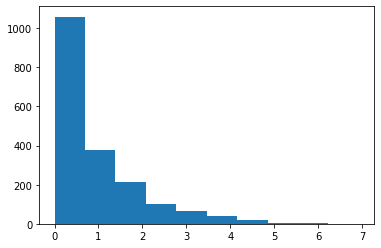

In [8]:
plt.hist(np.log(facebook_train[facebook_train['outcome']==0]['mean_bids']))

(array([ 5.,  4.,  8., 23., 26., 24.,  8.,  1.,  1.,  3.]),
 array([0.        , 0.57838252, 1.15676504, 1.73514755, 2.31353007,
        2.89191259, 3.47029511, 4.04867763, 4.62706015, 5.20544266,
        5.78382518]),
 <BarContainer object of 10 artists>)

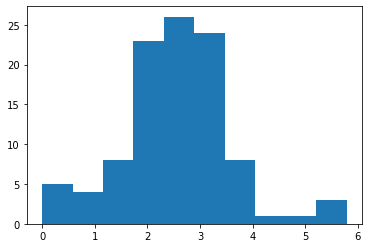

In [9]:
plt.hist(np.log(facebook_train[facebook_train['outcome']==1]['mean_bids']))

In [16]:
print(np.sum(np.isnan(facebook_train[facebook_train['outcome']==0]['median_interval'])))
print(np.sum(np.isnan(facebook_train[facebook_train['outcome']==1]['median_interval'])))

591
5


(array([  7.,  26.,  60.,  85., 149., 252., 288., 295., 122.,  35.]),
 array([17.77882686, 19.19167941, 20.60453196, 22.01738452, 23.43023707,
        24.84308962, 26.25594217, 27.66879473, 29.08164728, 30.49449983,
        31.90735238]),
 <BarContainer object of 10 artists>)

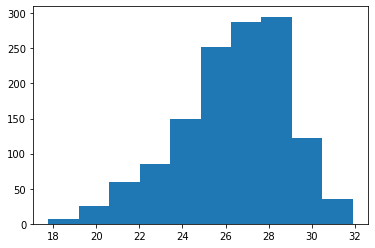

In [17]:
plt.hist(np.log(facebook_train[facebook_train['outcome']==0]['median_interval']))

(array([11.,  2., 14., 10., 14., 25.,  9., 10.,  2.,  1.]),
 array([19.8582684 , 20.71769771, 21.57712702, 22.43655633, 23.29598564,
        24.15541496, 25.01484427, 25.87427358, 26.73370289, 27.5931322 ,
        28.45256151]),
 <BarContainer object of 10 artists>)

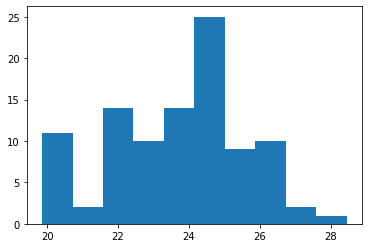

In [18]:
plt.hist(np.log(facebook_train[facebook_train['outcome']==1]['median_interval']))

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay

In [32]:
median_interval2 = facebook_train['median_interval'].to_numpy().copy()
is_human = (facebook_train['outcome'] == 0).to_numpy()
is_nan = np.isnan(median_interval2)
median_interval2[is_human & is_nan] = np.median(median_interval2[is_human & ~is_nan])
median_interval2[~is_human & is_nan] = np.median(median_interval2[~is_human & ~is_nan])
facebook_train['median_interval2'] = median_interval2
facebook_train

,bidder_id,payment_account,address,outcome,mean_bids,median_interval,median_interval2
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1.333333,5.081316e+11,5.081316e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.000000,3.233579e+12,3.233579e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,1.000000,NaN,3.544474e+11
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.000000,NaN,3.544474e+11
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,6.739130,3.365789e+10,3.365789e+10
...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,1.440000,5.628421e+11,5.628421e+11
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.000000,NaN,3.544474e+11
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.000000,9.798474e+12,9.798474e+12
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.000000,NaN,3.544474e+11


In [78]:
mean_bids2 = facebook_train['mean_bids'].to_numpy().copy()
is_human = (facebook_train['outcome'] == 0).to_numpy()
is_nan = np.isnan(mean_bids2)
mean_bids2[is_human & is_nan] = np.median(mean_bids2[is_human & ~is_nan])
mean_bids2[~is_human & is_nan] = np.median(mean_bids2[~is_human & ~is_nan])
facebook_train['mean_bids2'] = mean_bids2
facebook_train

,bidder_id,payment_account,address,outcome,mean_bids,median_interval,median_interval2,mean_bids2
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,1.333333,5.081316e+11,5.081316e+11,1.333333
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.000000,3.233579e+12,3.233579e+12,3.000000
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,1.000000,NaN,3.544474e+11,1.000000
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.000000,NaN,3.544474e+11,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,6.739130,3.365789e+10,3.365789e+10,6.739130
...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,a1f85275793c4a782f0a668711f41b927ivc9,e6882cf204a9482edd042b6e31791dfctxzx8,0.0,1.440000,5.628421e+11,5.628421e+11,1.440000
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,a3d2de7675556553a5f08e4c88d2c2286s1m2,b9b03d5a127eb07aeb9163cdcf524e1344ac9,0.0,1.000000,NaN,3.544474e+11,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0,2.000000,9.798474e+12,9.798474e+12,2.000000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0,1.000000,NaN,3.544474e+11,1.000000


In [92]:
X = facebook_train[['mean_bids2', 'median_interval2']].to_numpy()
y = facebook_train['outcome'].to_numpy()

X_train = X[:1500]
y_train = y[:1500]
X_test = X[1500:]
y_test = y[1500:]

rfc_list = []
for i in range(5):
    i_rfc = RandomForestClassifier(n_estimators=800, min_samples_leaf=1, random_state=i, criterion='entropy')
    rfc_list.append(i_rfc)

all_index = np.arange(1500)
n_train = 1500
# n_train = 1000
# p = ProgressBar(0, 10)
for j in range(1):
#     p.update(i)
#     np.random.shuffle(all_index)
    X_train2 = X_train[all_index[:n_train]]
    y_train2 = y_train[all_index[:n_train]]

    for i in range(5):
        rfc_list[i].fit(X_train2, y_train2)

pred_array = np.zeros((len(rfc_list), len(y_test)))
for i in range(len(rfc_list)):
    pred_array[i] = rfc_list[i].predict(X_test)
roc_auc_score(y_test, pred_array.mean(axis=0))

0.6010732323232324

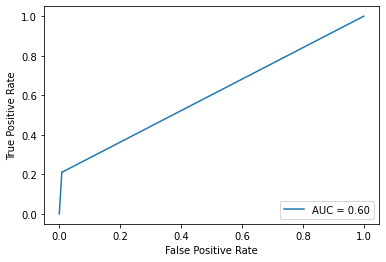

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, pred_array.mean(axis=0))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

なんかあんまりうまくいかなかったっすね